In [2]:
import pandas as pd

df_time_series = pd.read_pickle('cleaned_dataset_4months.pkl')

In [7]:
df_time_series.columns

Index(['DateTime', 'TEWS_moisture', 'slurry_flowrate', 'ODOS_HLAS_rate',
       'ODOS_caustic_NaOH_rate', 'temp_slurry_before_URACA',
       'spray_slurry_rate', 'burner_gas_flow', 'tower_inlet_air_flow',
       'TiT_tower_inlet_temperature', 'ambient_temperature',
       'tower_primary_fan_of_max_speed', 'Recipe_name', 'HP_LVL_15mins',
       'osiris_tit_optimal', 'osiris_primary_fan_optimal',
       'nozzle_configuration_top', 'nozzle_configuration_bottom',
       'tower_under_pressure', 'nozzle_pressure_top',
       'nozzle_pressure_bottom'],
      dtype='object')

In [11]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [12]:
arima_model = arimamodel(df_time_series['TEWS_moisture'][0:5000])
arima_model.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-105937.869, Time=0.15 sec
Total fit time: 0.155 seconds


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                        SARIMAX   Log Likelihood               52969.935
Date:                Thu, 12 May 2022   AIC                        -105937.869
Time:                        10:58:55   BIC                        -105931.352
Sample:                             0   HQIC                       -105935.585
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10    2.8e-11      3.568      0.000    4.51e-11    1.55e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):              1875.00
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
for i in range(0,10):
    model = ARIMA(df_time_series['TEWS_moisture'][0:5000], order=(5, i, 2))
    res = model.fit()
    print(i,j,res.summary())


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 0, 2)   Log Likelihood               53189.796
Date:                Thu, 12 May 2022   AIC                        -106361.592
Time:                        11:08:15   BIC                        -106302.937
Sample:                             0   HQIC                       -106341.034
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.825e-06   2.31e-14  -2.09e+08      0.000   -4.82e-06   -4.82e-06
ar.L1        8.57e-20   1.11e-19      0.770      0.441   -1.32e-19    3.04e-19
ar.L2       1.885e-19   1.11e-19      1.695     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/

1 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 1, 2)   Log Likelihood               56934.020
Date:                Thu, 12 May 2022   AIC                        -113852.040
Time:                        11:08:17   BIC                        -113799.904
Sample:                             0   HQIC                       -113833.767
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.449e-10   5.18e-20  -6.66e+09      0.000   -3.45e-10   -3.45e-10
ar.L2       1.725e-15         -0       -inf      0.000    1.72e-15    1.72e-15
ar.L3       1.725e-15    3.7e-30   4.66e+14     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and

2 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 2, 2)   Log Likelihood               57053.875
Date:                Thu, 12 May 2022   AIC                        -114091.749
Time:                        11:08:21   BIC                        -114039.615
Sample:                             0   HQIC                       -114073.477
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0   1.03e-19         -0      1.000   -2.03e-19    2.03e-19
ar.L2              -0         -0        nan        nan           0          -0
ar.L3              -0    2.9e-32         -0     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupp

3 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 3, 2)   Log Likelihood               48885.650
Date:                Thu, 12 May 2022   AIC                         -97755.300
Time:                        11:08:26   BIC                         -97703.168
Sample:                             0   HQIC                        -97737.028
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       3.648e-05   2.77e-24   1.32e+19      0.000    3.65e-05    3.65e-05
ar.L2       1.312e-05   1.54e-24    8.5e+18      0.000    1.31e-05    1.31e-05
ar.L3        1.23e-09   2.37e-28   5.18e+18     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided an

4 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 4, 2)   Log Likelihood               54586.717
Date:                Thu, 12 May 2022   AIC                        -109157.435
Time:                        11:08:31   BIC                        -109105.303
Sample:                             0   HQIC                       -109139.163
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.241e-13   1.88e-20  -1.73e+07      0.000   -3.24e-13   -3.24e-13
ar.L2       1.359e-16         -0       -inf      0.000    1.36e-16    1.36e-16
ar.L3       1.359e-16   7.06e-36   1.92e+19     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupp

5 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 5, 2)   Log Likelihood               46386.275
Date:                Thu, 12 May 2022   AIC                         -92756.549
Time:                        11:08:47   BIC                         -92704.420
Sample:                             0   HQIC                        -92738.278
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -4.002e-06   7.58e-20  -5.28e+13      0.000      -4e-06      -4e-06
ar.L2      -9.774e-06   1.31e-20  -7.46e+14      0.000   -9.77e-06   -9.77e-06
ar.L3       1.221e-08   6.08e-25   2.01e+16     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupp

6 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 6, 2)   Log Likelihood               36050.851
Date:                Thu, 12 May 2022   AIC                         -72085.701
Time:                        11:09:07   BIC                         -72033.573
Sample:                             0   HQIC                        -72067.430
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0003   2.42e-19  -1.38e+15      0.000      -0.000      -0.000
ar.L2         -0.0003   9.39e-20  -3.69e+15      0.000      -0.000      -0.000
ar.L3         -0.0004   1.85e-18   -1.9e+14     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupp

7 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 7, 2)   Log Likelihood               37852.876
Date:                Thu, 12 May 2022   AIC                         -75689.752
Time:                        11:09:23   BIC                         -75637.625
Sample:                             0   HQIC                        -75671.481
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1717   2.09e-05  -8219.056      0.000      -0.172      -0.172
ar.L2         -0.1585   2.04e-05  -7766.045      0.000      -0.159      -0.158
ar.L3         -0.1348   2.02e-05  -6688.680     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupp

8 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 8, 2)   Log Likelihood               29143.204
Date:                Thu, 12 May 2022   AIC                         -58270.408
Time:                        11:09:41   BIC                         -58218.283
Sample:                             0   HQIC                        -58252.137
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0002   6.09e-17   3.45e+12      0.000       0.000       0.000
ar.L2       5.393e-05   1.85e-16   2.92e+11      0.000    5.39e-05    5.39e-05
ar.L3          0.0002   2.92e-16   6.57e+11     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9 2                                SARIMAX Results                                
Dep. Variable:          TEWS_moisture   No. Observations:                 5000
Model:                 ARIMA(5, 9, 2)   Log Likelihood               31431.322
Date:                Thu, 12 May 2022   AIC                         -62846.644
Time:                        11:10:08   BIC                         -62794.521
Sample:                             0   HQIC                        -62828.374
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0004   1.05e-14  -3.48e+10      0.000      -0.000      -0.000
ar.L2         -0.0007   9.51e-15  -7.78e+10      0.000      -0.001      -0.001
ar.L3         -0.0001   8.57e-15  -1.34e+10     

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


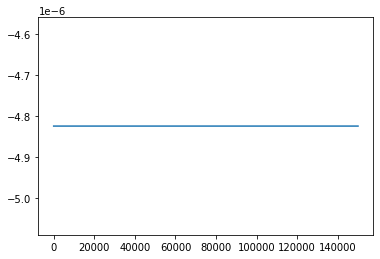

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pylab as plt
# for i in range(0,6):
#     for j in range(0,3):
model = ARIMA(df_time_series['TEWS_moisture'][0:5000], order=(5, 0, 3))
res = model.fit()
        # print(i,j,res.summary())
plt.plot(res.fittedvalues)